<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


## Prepared by Lisa Boettcher

Dated:  September 10, 2024

Prepared for Coursera-IBM-Statistics-for-Data-Science-With-Python

In [31]:
# import required packages for project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import datetime
import matplotlib.pyplot as plt

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

Autosaving every 60 seconds


#### Read the dataset in the csv file from the URL


## Load Dataset

# Load the housing data

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

# Data Description

## Dataset Variables

In [ ]:
Variable	 Description

CRIM	    per capita crime rate by town
ZN	        proportion of residential land zoned for lots over 25,000 sqft
INDUS	    proportion of non-retail business acres per town
CHAS	    Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX	        nitric oxides concentration (parts per 10 million)
RM	        average number of rooms per dwelling
AGE	        proportion of owner-occupied units built prior to 1940
DIS	        weighted distances to five Boston employment centres
RAD	        index of accessibility to radial highways
TAX	        full-value property-tax rate per $10,000
PTRATIO     pupil-teacher ratio by town
LSTAT	    % lower status of the population
MEDV	    Median value of owner-occupied homes in $1000's


## Project Task 1 Familiarize yourself with the dataset

In [40]:
# view dataset

boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [41]:
# preview the dataset

boston_df.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


In [42]:
# Define the dataset

boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [43]:
# show the basic stats

boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## Task 2 Generate basic statistics and visualizations for upper management 

For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

1. For the "Median value of owner-occupied homes" provide a boxplot
2. Provide a  bar plot for the Charles river variable
3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
5. Create a histogram for the pupil to teacher ratio variable


## Items 1-5 below are generated tests and items 6-9 are the findings/conclusions.

## 1. For the "Median value of owner-occupied homes" provide a boxplot

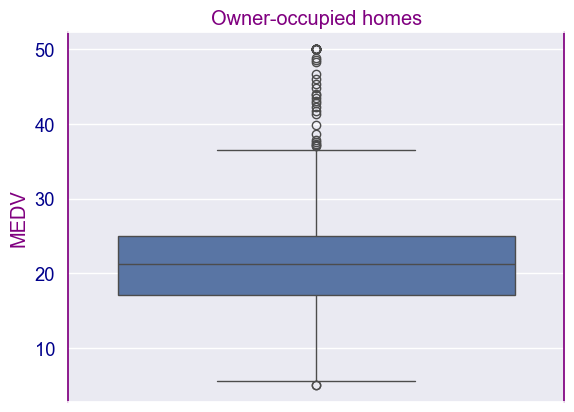

In [48]:
# Create a Boxplot

ax = sns.boxplot(y = 'MEDV', data = boston_df)
ax.set_title('Owner-occupied homes')
ax.title.set_color('purple')
ax.tick_params(axis='x', colors='darkblue')
ax.tick_params(axis='y', colors='darkblue')
ax.yaxis.label.set_color('purple')
ax.xaxis.label.set_color('purple')
ax.spines['right'].set_color('purple')
ax.spines['left'].set_color('purple')

## 2. Provide a  bar plot for the Charles river variable

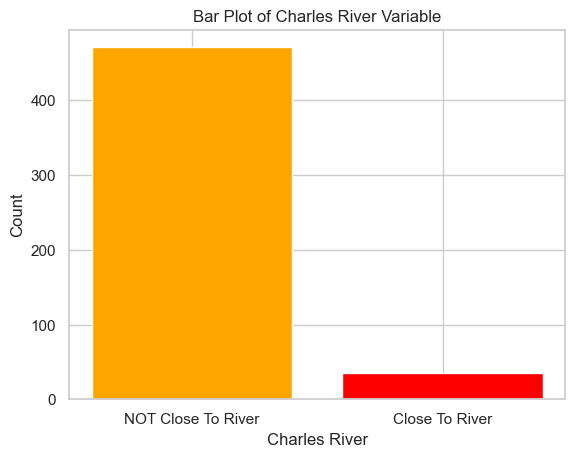

Index([0.0, 1.0], dtype='float64', name='CHAS')

In [319]:
# Create a Simple Bar Plot

# Count the occurrences of each unique value in 'Chas'
chas_counts = boston_df['CHAS'].value_counts()

plt.bar(chas_counts.index, chas_counts.values, color=['orange', 'red'])
plt.title('Bar Plot of Charles River Variable')
plt.xlabel('Charles River')
plt.ylabel('Count')
plt.xticks(chas_counts.index, labels=['NOT Close To River', 'Close To River'])
plt.show()
chas_counts.index       

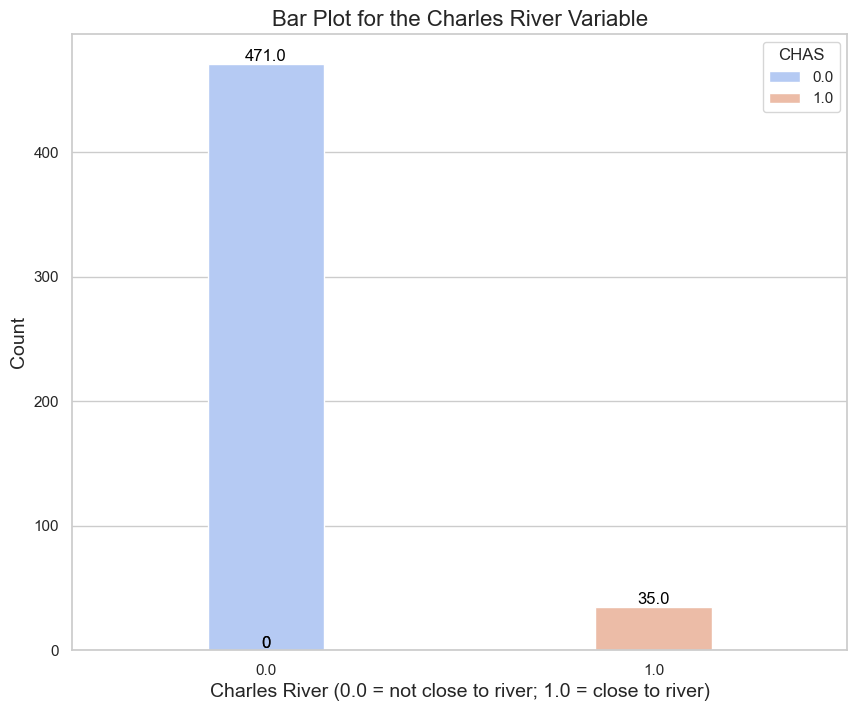

In [321]:
# Create a Detailed Bar Plot

plt.figure(figsize=(10, 8))
ax = sns.countplot(x='CHAS', data=boston_df, hue = 'CHAS', palette='coolwarm', width = 0.3)

# Add labels and title
plt.xlabel("Charles River (0.0 = not close to river; 1.0 = close to river)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Bar Plot for the Charles River Variable", fontsize=16)

# Add count annotations on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()

## 3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

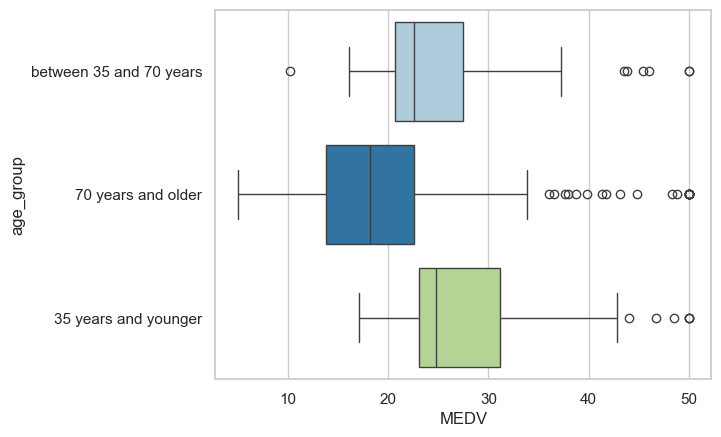

In [179]:
# Create Boxplot

boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
ax = sns.boxplot(x='MEDV',y = 'age_group', data = boston_df, palette="Paired")


## 4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 1.0, 'Nitric oxide concentration per proportion of non-retail business acres per town')

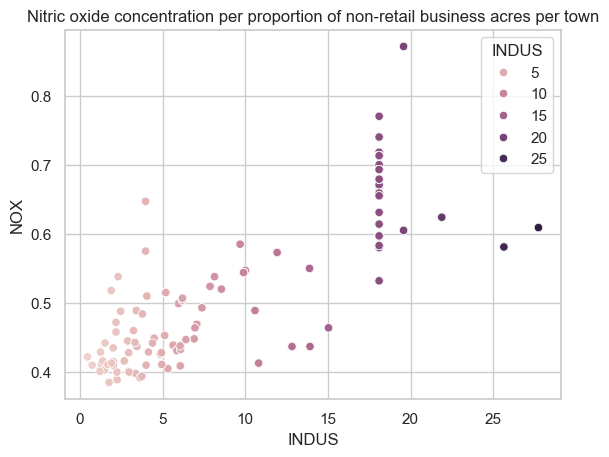

In [143]:
# Create Scatter Plot

ax4 = sns.scatterplot(y = 'NOX', x = 'INDUS', data = boston_df, hue = 'INDUS',)
ax4.set_title('Nitric oxide concentration per proportion of non-retail business acres per town')


## What can you say about the relationship?

Based on the values noted in the scatterplot above, there is no statistically significant relationship between the amount of Nitric Oxide concentration per proportion of non-retail businesses; implying that the presence of industrial areas does not necessarily correspond to higher levels of nitric oxide pollution in the air of the town.

## 5. Create a histogram for the pupil to teacher ratio variable

[Text(0.5, 0, 'Pupil-Teacher ratio by town'),
 Text(0, 0.5, 'Frequency of Pupil-Teacher ratio by town'),
 Text(0.5, 1.0, 'Histogram for the pupil to teacher ratio variable')]

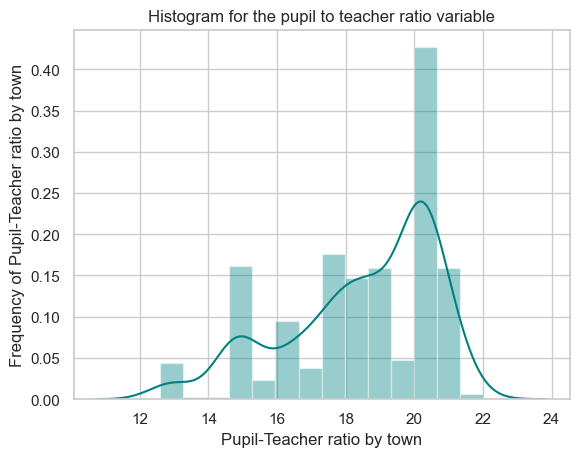

In [231]:
# Create Histogram

histplot = sns.distplot(boston_df['PTRATIO'], color='teal')
histplot.set(xlabel = "Pupil-Teacher ratio by town"
             , ylabel = "Frequency of Pupil-Teacher ratio by town"
            , title = "Histogram for the pupil to teacher ratio variable")


# Tests for Statistics

## 6: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Hypothesis:

Null Hypothesis: There is no significant difference in median value between houses bounded by the Charles River

Alternative Hypothesis: There is a significant difference in median value between houses bounded by the Charles River

Use α = 0.05

RULE OF THUMB:

A p-value less than 0.05 is typically considered to be statistically significant, in which case the null hypothesis should be rejected. 

A p-value greater than 0.05 means that deviation from the null hypothesis is not statistically significant, and the null hypothesis is not rejected.

In [284]:
# Review Dataset

boston_df.loc[(boston_df['CHAS'] == 0), 'CHAS_T'] = 'FAR'
boston_df.loc[(boston_df['CHAS'] == 1), 'CHAS_T'] = 'NEAR'
boston_df.head(6)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group,CHAS_T
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years,FAR
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older,FAR
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years,FAR
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years,FAR
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years,FAR
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7,between 35 and 70 years,FAR


In [254]:
# Levene's Test to check significance

scipy.stats.levene(boston_df['MEDV'], boston_df['CHAS'], center = 'mean')

LeveneResult(statistic=532.6811164157666, pvalue=5.402535119732986e-95)

In [250]:
# Welch's T-Test

scipy.stats.ttest_ind(boston_df['MEDV'], boston_df['CHAS'])

TtestResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305, df=1010.0)

Conclusion:  A p-value of 1.46 is significantly greater than 0.05; this means that the result is not considered statistically significant because a p-value above 0.05 indicates there is not enough evidence to reject the null hypothesis.  Therefore, there is no significant difference in median value between houses bounded by the Charles River.

## 7: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Hypothesis:

Null Hypotesis: There isn't statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940

Alternative Hypothesis: There is statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940

Use α = 0.05

RULE OF THUMB:

A p-value less than 0.05 is typically considered to be statistically significant, in which case the null hypothesis should be rejected. 

A p-value greater than 0.05 means that deviation from the null hypothesis is not statistically significant, and the null hypothesis is not rejected.

In [65]:
# Test using Analysis of Variance (ANOVA)

from statsmodels.formula.api import ols
lm = ols('MEDV ~ AGE', data = boston_df).fit()
table = sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


Conclusion: The p-value is 1.56.   As the p-value is greater than 0.05, we fail to reject the Null Hypothesis. Therefore, there is no statistical difference in median values of houses for each proportion of owner occupied units built prior to 1940. 

## 8: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Hypothesis:

Null Hypothesis: Nitric Oxide concentration is not correlated with the proportion of non-retail business acres per town

Alternative Hypothesis: Nitric Oxide concentration is correlated with the proportion of non-retail business acres per town

Use α = 0.05

RULE OF THUMB:

A p-value less than 0.05 is typically considered to be statistically significant, in which case the null hypothesis should be rejected. 

A p-value greater than 0.05 means that deviation from the null hypothesis is not statistically significant, and the null hypothesis is not rejected.

In [69]:
# Test using Pearson Correlation Test

scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241167e-98)

Conclusion:  The Pearson Correlation Coefficient is 0.76365.  The p-value of 7.91 is greater than 0.05.  A p-value greater than 0.05 means that deviation from the null hypothesis is not statistically significant, therefore the null hypothesis is not rejected. Therefore, Nitric Oxide concentration is not correlated with the proportion of non-retail business acres per town.

## 9: What is the impact of an additional weighted distance to the five Boston employment centers on the median value of owner occupied homes? (Regression analysis)

Hypothesis:

H0: There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

H1: There is impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

Use α = 0.05

RULE OF THUMB:

A p-value less than 0.05 is typically considered to be statistically significant, in which case the null hypothesis should be rejected. 

A p-value greater than 0.05 means that deviation from the null hypothesis is not statistically significant, and the null hypothesis is not rejected.

In [73]:
# Test using Regression Analysis

x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predisction = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           1.21e-08
Time:                        09:25:02   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [290]:
np.sqrt(0.062)  ##Pearson Coeffiecent valuea

0.24899799195977465

Conclusion: R-squared is 0.062.  The square root of R-squared is 0.25 showing a weak positive correlation.  Meaning, as the distance to employment centers increases so does the median home value increase as well.  The interpretation being that homes closer to employment centers having slightly higher price values due to increased convenience and accessibility.  Therefore, there is impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.